`ApJdataFrames` Luhman2010
---
`Title`: The Disk Population of the Taurus Star-Forming Region
`Authors`: Kevin L Luhman, et al.

Data is from this erratum to this paper:
http://iopscience.iop.org/0067-0049/189/2/353/article#apjs363478t1

In [1]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

##Table 4 - IRAC photometry of Taurus members

In [4]:
names = ['Name_2MASS','Name_alt','[3.6]','[4.5]','[5.8]','[8.0]','Date']
tbl4_pm = pd.read_csv('http://iopscience.iop.org/0067-0049/186/1/111/suppdata/apjs328021t4_ascii.txt',
                   sep='\t', names=names, skiprows=4, skipfooter=2, index_col=False,na_values=[' ... ', 'out', 'sat'])

In [5]:
tbl4_pm['NAME'] = tbl4_pm.Name_2MASS
no_name = tbl4_pm.NAME !=tbl4_pm.NAME
tbl4_pm.NAME[no_name] = tbl4_pm.Name_alt[no_name]
tbl4_pm.dropna(axis=0, subset=['NAME'], inplace=True)
tbl4_pm = tbl4_pm.drop(['Name_2MASS', 'Name_alt', 'Date'],axis=1)

###Pure data munging

In [7]:
fv = lambda a: a.split(' +or- ')[0] if a == a else np.NaN
fe = lambda a: a.split(' +or- ')[-1] if a == a else np.NaN #awesome little hack here!

In [8]:
bands = ['[3.6]','[4.5]','[5.8]','[8.0]']
tbl4 = tbl4_pm.drop(bands, axis=1)

In [9]:
for band in bands:
    tbl4[band]=tbl4_pm[band].apply(fv)
    tbl4[band+'_e']=tbl4_pm[band].apply(fe)

##Table 7 - spectral types and SED slopes

In [10]:
names = ['Name_2MASS','Name_alt','Spectral_type','alpha(2-8 mum)',
         'alpha(2-24 mum)','alpha(3.6-8 mum)','alpha(3.6-24 mum)','SED']
tbl7_unabridged = pd.read_csv('http://iopscience.iop.org/0067-0049/186/1/111/suppdata/apjs328021t7_ascii.txt',
                   sep='\t', names = names, skiprows=5, na_values = ' ... ', skipfooter=5, 
                   index_col=False)
tbl7_short = tbl7_unabridged[['Name_2MASS','Name_alt','Spectral_type', 'SED']]

In [11]:
tbl7_short['NAME'] = tbl7_short.Name_2MASS
no_name = tbl7_short.NAME !=tbl7_short.NAME
tbl7_short.NAME[no_name] = tbl7_short.Name_alt[no_name]
tbl7_short.dropna(axis=0, subset=['NAME'], inplace=True)
tbl7 = tbl7_short.drop(['Name_2MASS', 'Name_alt'],axis=1)

# Merge Table 4 and 7

In [12]:
out = pd.merge(tbl4, tbl7, on='NAME', how='outer')

Do some more data munging.

In [13]:
has_c = out['Spectral_type'].str.contains('c').values 
throw_out = has_c == True
out.drop(out.index[throw_out], inplace=True)

Convert the spectral type to a value.

In [14]:
from gully_custom import specTypePlus

SpT, _, _, _ = specTypePlus(out['Spectral_type'])
out['SpT'] = SpT

In [15]:
I1_I4 = out['[3.6]'].astype(float) -out['[8.0]'].astype(float)

In [16]:
sns.set_context('notebook', font_scale=1.5)

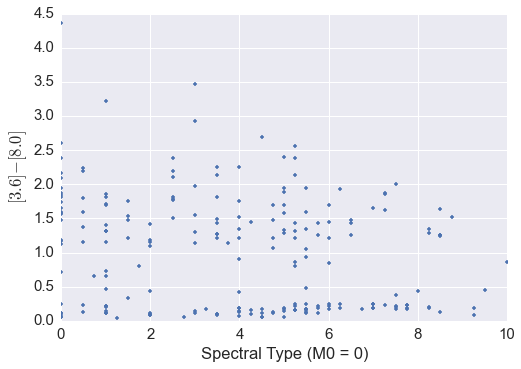

In [24]:
plt.plot(out.SpT, I1_I4, '.')
plt.xlim(0, 10)
plt.xlabel('Spectral Type (M0 = 0)')
plt.ylabel('$[3.6]-[8.0]$')

## Table 13- *corrected* (see erratum)

In [18]:
names = ['Spectral Type','J - H','H - K_s','K_s - [3.6]','[3.6] - [4.5]',
         '[4.5] - [5.8]','[5.8] - [8.0]','[8.0] - [24]']
tbl13 = pd.read_csv("http://iopscience.iop.org/0067-0049/189/2/353/suppdata/apjs363478t1_ascii.txt",
                   sep='\t', skiprows=range(4), names = names)
tbl13.drop(0, axis=0, inplace=True)
tbl13.head()

,Spectral Type,J - H,H - K_s,K_s - [3.6],[3.6] - [4.5],[4.5] - [5.8],[5.8] - [8.0],[8.0] - [24]
1,K4,0.53,0.10,0.06,0,0.04,0,0.04
2,K5,0.61,0.12,0.08,0,0.04,0,0.06
3,K6,0.66,0.14,0.10,0,0.04,0,0.08
4,K7,0.68,0.15,0.10,0,0.04,0,0.11
5,M0,0.70,0.16,0.10,0,0.04,0,0.13


In [19]:
from gully_custom import specType

In [20]:
tbl13['SpT'] = specType(tbl13['Spectral Type'])

##Save the data

    !!mkdir ../data/Luhman2010

In [21]:
tbl13.to_csv('../data/Luhman2010/tbl13_fixed_erratrum.csv', index=False)

In [22]:
out.to_csv('../data/Luhman2010/tbl4_7_merge.csv', index=False)

The end.